In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Label

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot

In [30]:
train_data = pd.read_csv("../data/fashion-mnist_train.csv")
test_data = pd.read_csv("../data/fashion-mnist_test.csv")

In [31]:
y_train = train_data.label
X_train = train_data.drop(columns=['label'])

y_test = test_data.label
X_test = test_data.drop(columns=['label'])

In [32]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


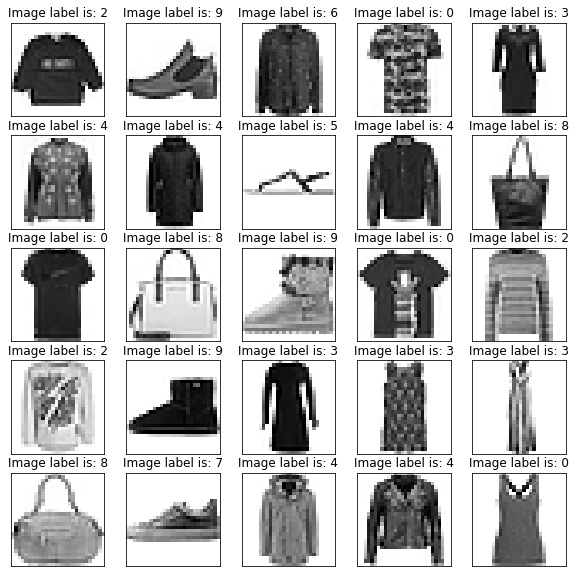

In [33]:
plt.figure(figsize=(10,10))
for i in range(25):
    image = np.array(X_train.iloc[i])
    image = np.reshape(image, (28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title("Image label is: {}".format(y_train[i]))
plt.show()

In [34]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

In [35]:
X_train = np.reshape(np.array(X_train), (60000, 28, 28, 1))
X_test = np.reshape(np.array(X_test), (10000, 28, 28, 1))

In [36]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [43]:
model = models.Sequential()
model.add(layers.Conv2D(49, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [44]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 49)        490       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 49)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        28288     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 25s 32ms/step - loss: 0.6529 - accuracy: 0.7958 - val_loss: 0.3909 - val_accuracy: 0.8627
Epoch 2/10
750/750 [==============================] - 26s 34ms/step - loss: 0.3627 - accuracy: 0.8682 - val_loss: 0.3633 - val_accuracy: 0.8686
Epoch 3/10
750/750 [==============================] - 27s 36ms/step - loss: 0.3144 - accuracy: 0.8853 - val_loss: 0.3571 - val_accuracy: 0.8728
Epoch 4/10
750/750 [==============================] - 27s 36ms/step - loss: 0.2893 - accuracy: 0.8929 - val_loss: 0.3313 - val_accuracy: 0.8777
Epoch 5/10
750/750 [==============================] - 27s 36ms/step - loss: 0.2645 - accuracy: 0.9024 - val_loss: 0.3178 - val_accuracy: 0.8891
Epoch 6/10
750/750 [==============================] - 26s 35ms/step - loss: 0.2527 - accuracy: 0.9049 - val_loss: 0.3172 - val_accuracy: 0.8879
Epoch 7/10
750/750 [==============================] - 26s 35ms/step - loss: 0.2430 - accuracy: 0.9105 - val_loss: 0.3069 - val_accuracy:

In [42]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.3015 - accuracy: 0.9064
Test accuracy: 0.9064000248908997
